<a href="https://colab.research.google.com/github/mansine/Electricity-Consumption/blob/main/Data%20Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN
from math import sqrt
import math
from scipy import stats
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy.linalg import eig
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from plotly.graph_objs import Scatter, Layout


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



The dataset used in this is processed version of File1.txt. Which is already mentioned on the [Data preprocessing.ipynp file](https://github.com/mansine/Electricity-Consumption/blob/main/Data%20preprocessing.ipynb)

In [ ]:
#reading the dataset
df= pd.read_csv("/content/ElectricityConsumption.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25726 entries, 0 to 25725
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    25726 non-null  object 
 1   hours                   25726 non-null  object 
 2   ElectricityConsumption  25726 non-null  float64
dtypes: float64(1), object(2)
memory usage: 603.1+ KB


In [ ]:
#merging date and hours into one column date_time
df['date_time']= df['Date'].map(str)+ ' '+ df['hours'].map(str)
df['date_time']=pd.to_datetime(df.date_time)
#Convert ElectricityConsumption to numeric
df['ElectricityConsumption'] = pd.to_numeric(df['ElectricityConsumption'], errors='coerce')
df = df.dropna(subset=['ElectricityConsumption'])


In [ ]:
df.head()

,Date,hours,ElectricityConsumption,date_time
0,2009-07-15,00:00,0.542570,2009-07-15 00:00:00
1,2009-07-15,00:30,0.474012,2009-07-15 00:30:00
2,2009-07-15,01:00,0.408903,2009-07-15 01:00:00
3,2009-07-15,01:30,0.361229,2009-07-15 01:30:00
4,2009-07-15,02:00,0.327049,2009-07-15 02:00:00


In [ ]:
#removing unwanted columns
df.drop('hours', axis=1, inplace=True)


In [ ]:
df1=df.loc[:,['date_time','ElectricityConsumption']]
df1.set_index('date_time',inplace=True)

In [ ]:
#Create year, quarter, month and day features.
#Create weekday feature, “0” is weekend and “1” is weekday
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)
df=df.loc[:,['date_time','ElectricityConsumption', 'year','quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["date_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.date_time.min())
print('The time series ends on: ', df.date_time.max())

Number of rows and columns after removing missing values: (25726, 7)
The time series starts from:  2009-07-15 00:00:00
The time series ends on:  2011-01-01 23:30:00


# Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



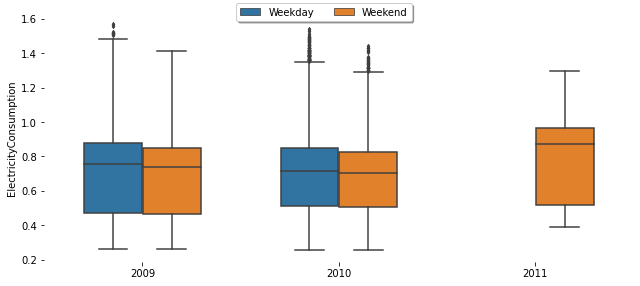

In [ ]:
dic={0:'Weekend',1:'Weekday'}
df['Day'] = df.weekday.map(dic)
a=plt.figure(figsize=(9,4)) 
plt1=sns.boxplot('year','ElectricityConsumption',hue='Day',width=0.6,fliersize=3,
                    data=df)                                                                                                                                                                                                                                                                                                                                                 
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False);

The weekday median of electricity consumption seems to be lower in 2009 and 2010.There is no data for weekend in 2011

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



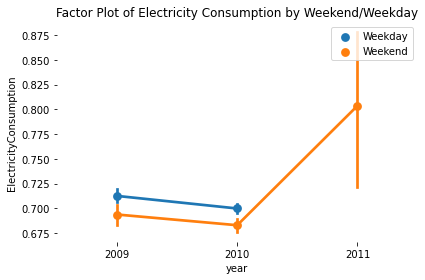

In [ ]:
plt1=sns.factorplot('year','ElectricityConsumption',hue='Day',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Electricity Consumption by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

The pattern of weekend and weekday in the dataset is 
similar for 2009 to 2010 andthere is no data of weekend in 2011.

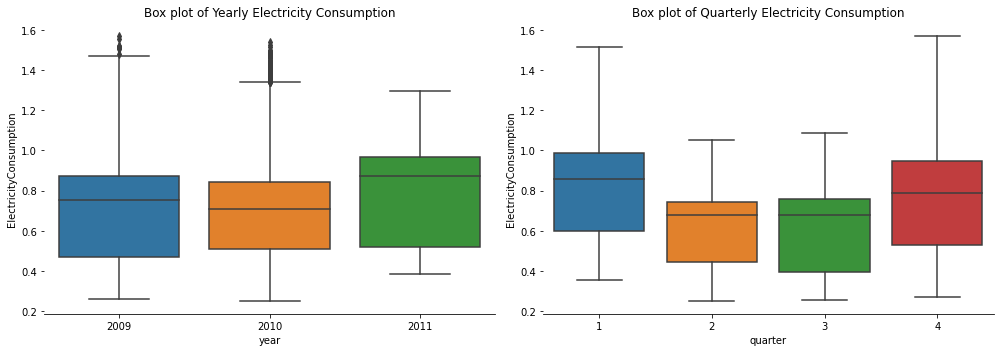

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="ElectricityConsumption", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Electricity Consumption')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="quarter", y="ElectricityConsumption", data=df)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Electricity Consumption')
sns.despine(left=True)
plt.tight_layout();

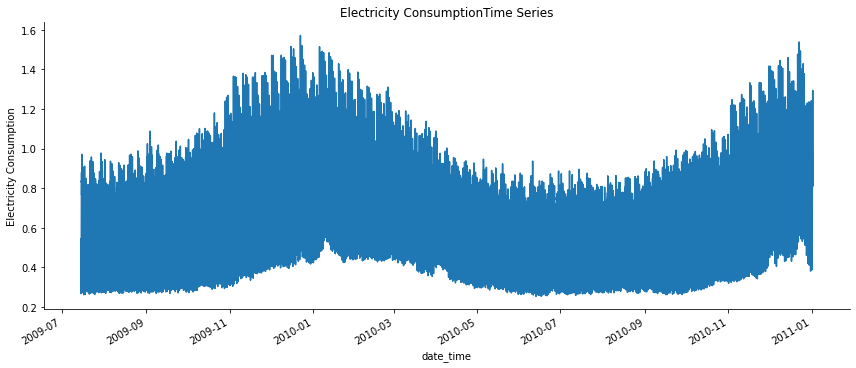

In [ ]:
df1=df.loc[:,['date_time','ElectricityConsumption']]
df1.set_index('date_time',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Electricity Consumption')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Electricity ConsumptionTime Series')
sns.despine(top=True)
plt.show();

Now the date/time column is aggregated by the mean of Electricity Consumption toremove the duplicate entry of dates. Figure shows the aggregated data time series

,count,mean,std,min,25%,50%,75%,max
ElectricityConsumption,25726.0,0.699184,0.248401,0.253101,0.498196,0.71937,0.852696,1.571199


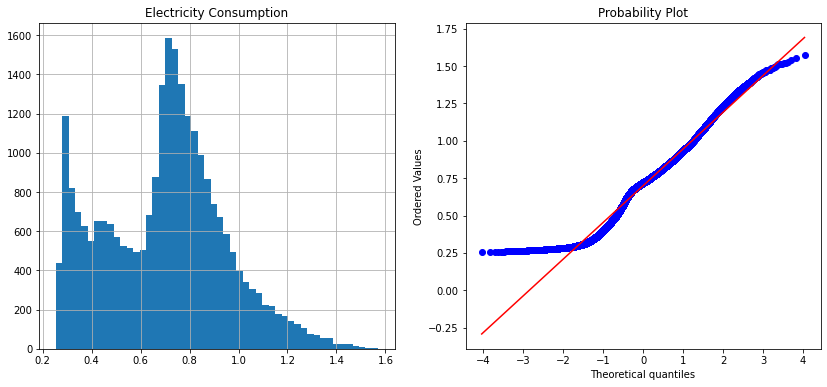

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['ElectricityConsumption'].hist(bins=50)
plt.title('Electricity Consumption')
plt.subplot(1,2,2)
stats.probplot(df['ElectricityConsumption'], plot=plt);
df1.describe().T

It is easier to view individual data items with a normal probability plot that do notfit the normal distribution quite well. Figure shows the normal probability plot andimplies that the data is far from normally distributed

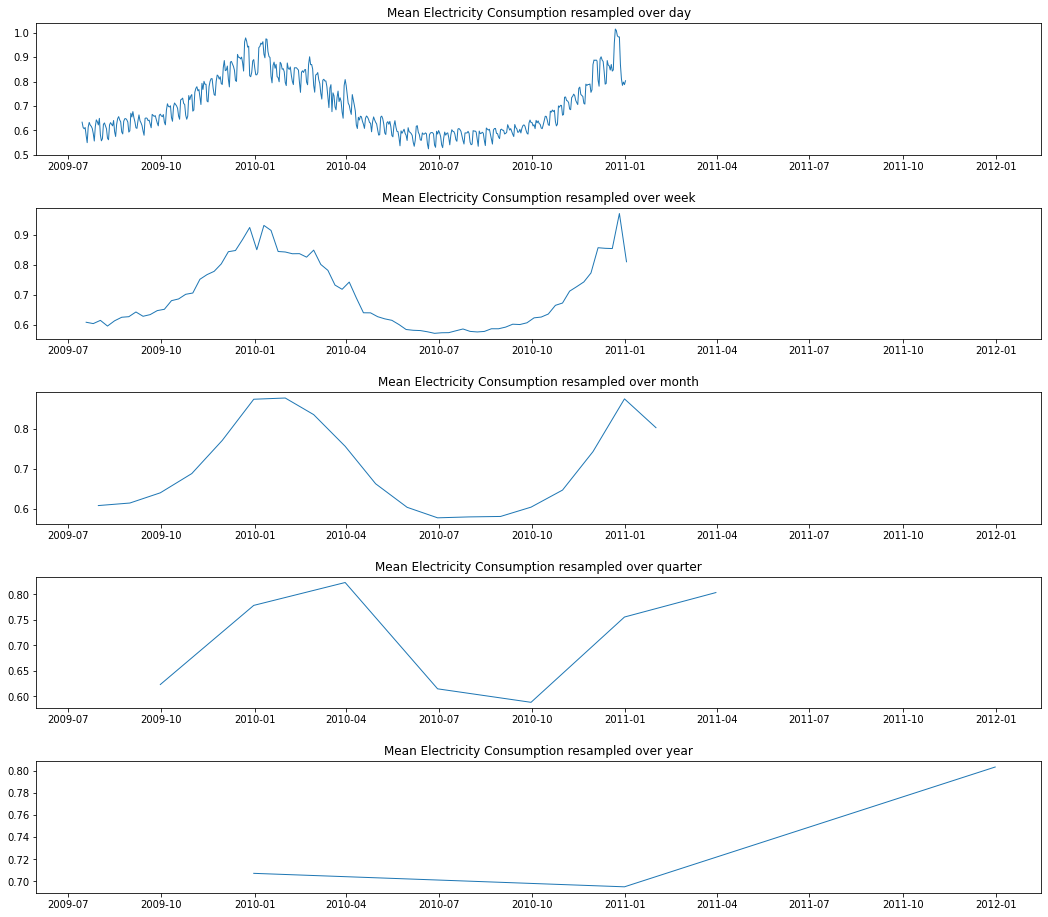

In [ ]:
#Average Electricity Consumption Resampled Over Day, Week, Month, Quarter and Year
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['ElectricityConsumption'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Electricity Consumption resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['ElectricityConsumption'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Electricity Consumption resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['ElectricityConsumption'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Electricity Consumption resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['ElectricityConsumption'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Electricity Consumption resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df1['ElectricityConsumption'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Electricity Consumption resampled over year')
ax5.tick_params(axis='both', which='major');

In the dataset it showing downward and then upward trend. Electricity consumptionseems to be going downward after April and then going upward after July.

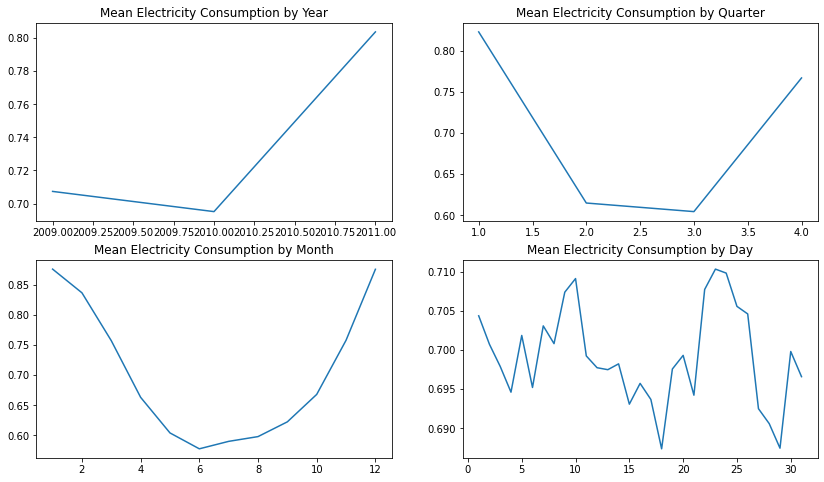

In [ ]:
#Plot Mean Global Active Power Grouped by Year, Quarter, Month and Day
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').ElectricityConsumption.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Electricity Consumption by Year')

plt.subplot(2,2,2)
df.groupby('quarter').ElectricityConsumption.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Electricity Consumption by Quarter')

plt.subplot(2,2,3)
df.groupby('month').ElectricityConsumption.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Electricity Consumption by Month')

plt.subplot(2,2,4)
df.groupby('day').ElectricityConsumption.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Electricity Consumption by Day');

The graph shows upward trend in mean electricity consumption by year. Then thelowest mean electricity consumption shown in quarter 2 and 3. The lowest electricityconsumption shown in June

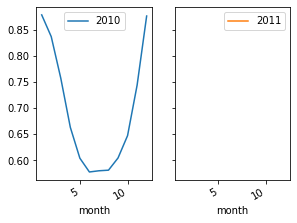

In [ ]:
#Electricity Consumption by Year

pd.pivot_table(df.loc[df['year'] != 2009], values = "ElectricityConsumption", 
               columns = "year", index = "month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

# Stationarity

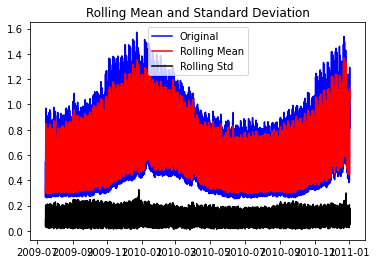

Results of dickey fuller test
Test Statistics                   -3.177972
p-value                            0.021296
No. of lags used                  49.000000
Number of observations used    25676.000000
critical value (1%)               -3.430605
critical value (5%)               -2.861653
critical value (10%)              -2.566830
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['ElectricityConsumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df1)

# LSTM

In [ ]:
dataset = df.ElectricityConsumption.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(12, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics="accuracy")

history = model.fit(X_train, Y_train, epochs=100, batch_size=30, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/100
685/685 [==============================] - 3s 3ms/step - loss: 0.0188 - accuracy: 6.0180e-05 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 2/100
685/685 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 6.0180e-05 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 3/100
685/685 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 6.0180e-05 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 4/100
685/685 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 6.0180e-05 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 5/100
685/685 [==============================] - 1s 2ms/step - loss: 9.8512e-04 - accuracy: 6.0180e-05 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/100
685/685 [==============================] - 1s 2ms/step - loss: 9.2431e-04 - accuracy: 6.0180e-05 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 7/100
685/685 [==============================] - 1s 2ms/step - loss: 8.8118e-04 

Below graph shows the plot of prediction after aggregating the data by mean of electricity consumption through date$\_$time. The accuracy of the model is 81.14132881164551 %

In [ ]:
model.save('MusicalInstrumentReviews.h5')
Y_test_dummies = pd.get_dummies(Y_test).values
print('Shape of Label tensor: ', Y_test_dummies.shape)
# model evaluation
from keras.models import load_model

model = load_model('MusicalInstrumentReviews.h5')
scores = model.evaluate(X_test, Y_test_dummies)

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

Shape of Label tensor:  (5115, 5114)
160/160 [==============================] - 1s 2ms/step - loss: 0.1509 - accuracy: 0.8114
Test accuracy:  81.14132881164551 %


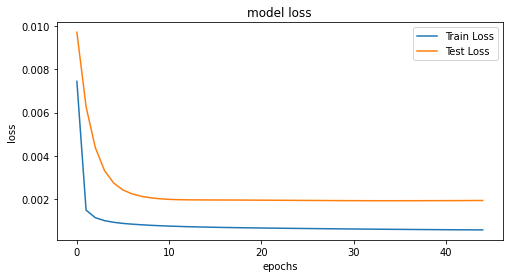

In [ ]:
#Plot Model Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

Train Score: 0.05 RMSE
Test Score: 0.06 RMSE


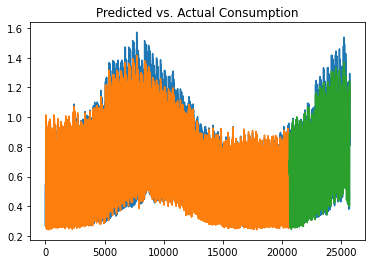

In [ ]:
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
predictions = testpred
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainpredPlot = np.empty_like(dataset)
trainpredPlot[:, :] = np.nan
trainpredPlot[look_back:len(trainpred)+look_back, :] = trainpred

testpredPlot = np.empty_like(dataset)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(look_back*2)+1:len(dataset)-1, :] = testpred

inversetransform, =plt.plot(scaler.inverse_transform(dataset))
trainpred, =plt.plot(trainpredPlot)
testpred, =plt.plot(testpredPlot)
plt.title("Predicted vs. Actual Consumption")
plt.show()


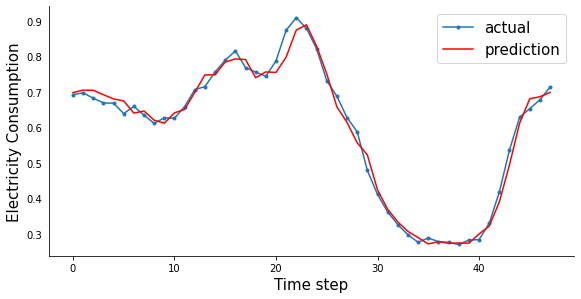

In [ ]:
#Compare Actual vs. Prediction
aa=[x for x in range(48)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:48], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:48], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Electricity Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();